In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
res_dir = './Results/Plots/'


### Helper Functions

In [3]:
def merge_scores(dfs):
    dfs_merge = dfs[0]
    for i in range(1, len(dfs)):
        dfs_merge = dfs_merge.join(dfs[i][[1]], how = 'left', rsuffix=f"r{i}")
    columns = ["frames"]
    columns.extend([f"S{i}" for i in range(len(dfs))])
    #print(columns)
    #print(dfs_merge)
    dfs_merge.columns = columns
    dfs_merge = dfs_merge.drop("frames", axis=1)
    dfs_merge['MeanScore'] = dfs_merge.mean(axis=1)
    return dfs_merge

In [10]:
def read_scores(env):
    ncts = []
    cts = []
    cets = []
    st = []
    for f in os.listdir(res_dir):
        if env in f:
            if "NCT" in f:
                ncts.append(pd.read_csv(os.path.join(res_dir, f), header=None))
            elif "CT" in f:
                cts.append(pd.read_csv(os.path.join(res_dir, f), header=None))
            elif "CET" in f:
                cets.append(pd.read_csv(os.path.join(res_dir, f), header=None))
            elif "ST" in f:
                st.append(pd.read_csv(os.path.join(res_dir, f), header=None))
    return ncts, cts, cets, st

### Load Result Files

In [8]:
ant, ant_ct, ant_cet, ant_st = read_scores("Ant")
ant = merge_scores(ant)
ant_ct = merge_scores(ant_ct)
ant_cet = merge_scores(ant_cet)
ant_st = merge_scores(ant_st)

In [13]:
hop, hop_ct, hop_cet, hop_st = read_scores("Hopper")
hop = merge_scores(hop)
hop_ct = merge_scores(hop_ct)
hop_cet = merge_scores(hop_cet)
hop_st = merge_scores(hop_st)

In [14]:
hop_st


,S0,S1,S2,MeanScore
0,76.383,22.250,22.064,40.232333
1,110.847,107.878,105.075,107.933333
2,111.284,195.810,162.702,156.598667
3,134.557,207.195,180.737,174.163000
4,234.326,213.102,180.737,209.388333
...,...,...,...,...
155,2971.401,3610.788,3523.088,3368.425667
156,2971.401,3605.697,3523.088,3366.728667
157,2971.401,3609.444,3523.088,3367.977667
158,2971.401,1951.839,3523.088,2815.442667


In [7]:
swim, swim_ct, swim_cet, swim_st = read_scores("Swimmer")
swim = merge_scores(swim)
swim_ct = merge_scores(swim_ct)
swim_st = merge_scores(swim_st)

In [8]:
hc, hc_ct, hc_cet, hc_st  = read_scores("HalfCheetah")
hc = merge_scores(hc)
hc_ct = merge_scores(hc_ct)
hc_st = merge_scores(hc_st)

### Plotting 

In [15]:
def plot_scores(nct, ct, title= ""):
    plt.figure(figsize=(12,6))
    for i in range(len(nct.columns)):
        plt.plot(nct[nct.columns[i]], color='r', linewidth=.3)
    for i in range(len(ct.columns)):
        plt.plot(ct[ct.columns[i]], color='g', linewidth=.3)
    plt.plot(nct['MeanScore'], color='r', linewidth=2, ls='--')
    plt.plot(ct['MeanScore'], color='g', linewidth=2, ls='--')
    plt.xlabel("Generation")
    plt.ylabel("Score")
    plt.title(title)

In [7]:
plot_scores(ant, ant_st, title= "Ant")

NameError: name 'ant' is not defined

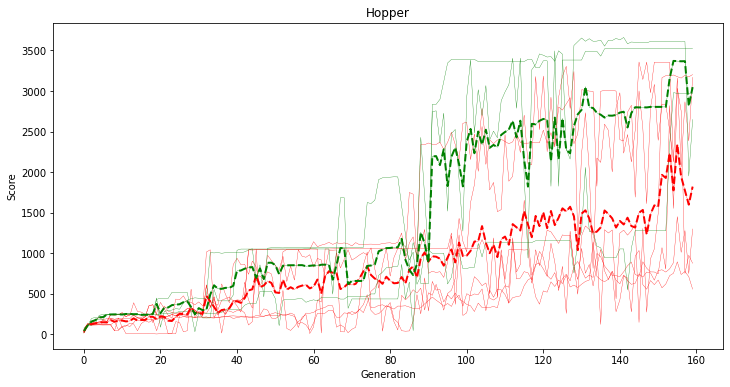

In [16]:
plot_scores(hop, hop_st, title= "Hopper")

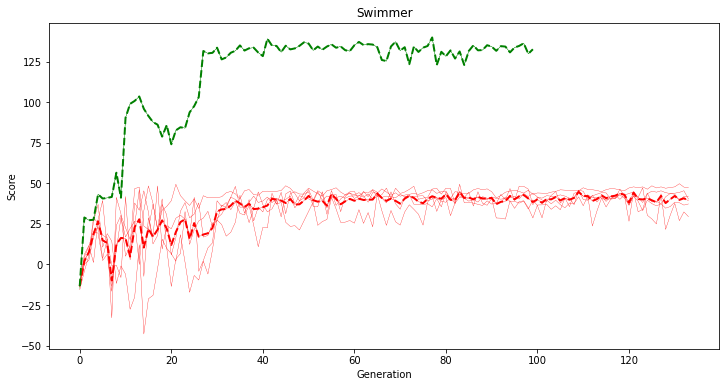

In [19]:
plot_scores(swim, swim_st, title= "Swimmer")

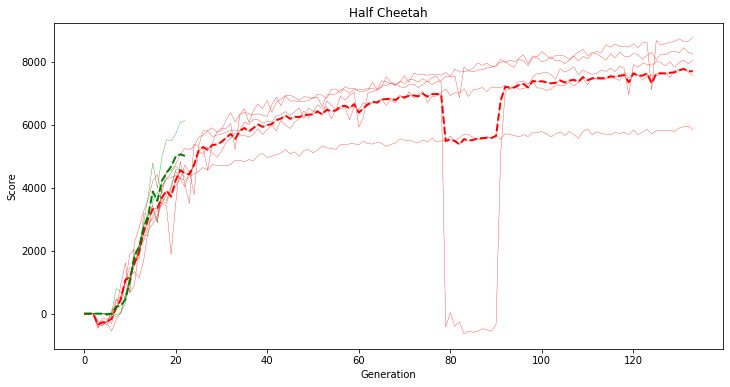

In [20]:
plot_scores(hc, hc_st, title= "Half Cheetah")